# Wine Quality

In this project we will predict the qulaity of the red wine, based on the history data.   We are using the data set from the UCI repository, following are the columns it contains :

<br>Input variables (based on physicochemical tests):</br>
<br>1 - fixed acidity</br>
<br>2 - volatile acidity</br>
<br>3 - citric acid</br>
<br>4 - residual sugar</br>
<br>5 - chlorides</br>
<br>6 - free sulfur dioxide</br>
<br>7 - total sulfur dioxide</br>
<br>8 - density</br>
<br>9 - pH</br>
<br>10 - sulphates</br>
<br>11 - alcohol</br>
<br>Output variable (based on sensory data):</br>
<br>12 - quality (score between 0 and 10) </br>

In [1]:
#import the neccesary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
# read the data 

data_red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')
#data_white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [3]:
# check the data ..

data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# check if any of the column is Object or non integer ?
data_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


from the above info we can see that we dont have any null values in the records, as all the columns are not null listed here. 

now we can check the describe method to check the mean and STD of the data. 


In [5]:
data_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


from the above description we can see that free sulfer dioxide and total sulfer dioxide is having too much standard deviation , this means that there can be some outliers in the data, we can check that by checking those 2 colums 


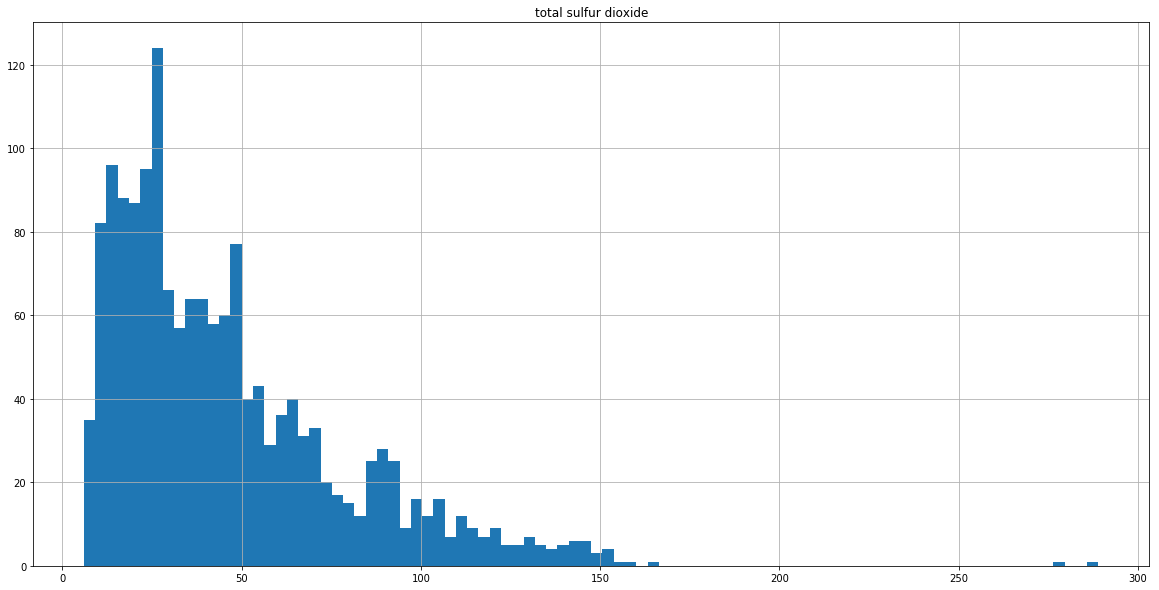

In [6]:
data_red.hist('total sulfur dioxide' , bins=90, figsize=(20,10))
plt.show()

In [7]:
data_red[data_red['total sulfur dioxide'] > 250 ]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1079,7.9,0.3,0.68,8.3,0.05,37.5,278.0,0.99316,3.01,0.51,12.3,7
1081,7.9,0.3,0.68,8.3,0.05,37.5,289.0,0.99316,3.01,0.51,12.3,7


In [8]:
data_red['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [9]:
data_red.drop([1079,1081],inplace=True)

In [10]:
# create a new columns taste which will contains the classifier class
data_red['taste'] = "Good"

In [11]:
def valueUpdater(x):
    if x > 7:
        return 'Good'
    elif x < 5:
        return 'Bad'
    else:
        return 'Normal'

    
data_red['taste'] = data_red['quality'].apply(lambda x : valueUpdater(x))

In [12]:
data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,taste
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Normal
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Normal
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Normal
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Normal
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Normal


In [13]:
X = data_red.loc[:,:'alcohol']
y = data_red.taste


In [14]:
# Scale the data using StandardScalar

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

scaled_data = scalar.fit_transform(X)


In [15]:
# convert back to dataframe . 

X = pd.DataFrame(scaled_data,index=X.index,columns=X.columns)


In [16]:
# Split the training set and testing set.
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#X.reindex
#y.reindex

# we wil use the stratifiedShuffleSplit as the data is not balanced, so there are chances we will not be able to train 
# model for some input data and for those dataset it will behave strangely. 

from sklearn.model_selection import StratifiedShuffleSplit

stratified_suffle = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
#stratified_suffle.get_n_splits(X, y)

for train_index, test_index in stratified_suffle.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]



In [17]:
def label_Converter(str):
    if str == 'Bad':
        return 0
    elif str == 'Normal':
        return 1
    else:
        return 2



In [18]:
y_train = y_train.apply(lambda x: label_Converter(x))

In [19]:
# Lets us Decesion  tree Model.

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

decision_clf = DecisionTreeClassifier()

y_scores = cross_val_predict(decision_clf,X_train,y_train,cv=4)

#y_scores = cross_val_score(decision_clf,X_train,y_train)




In [20]:
y_scores

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train,y_scores)

array([[   9,   40,    1],
       [  45, 1150,   17],
       [   1,   10,    4]], dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train,y_scores)

0.9107282693813625

In [23]:
# Calculate the ROC curve 

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores,pos_label=2)

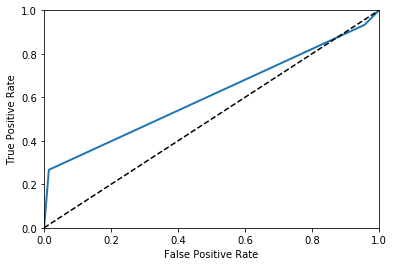

In [24]:
def plot_roc_curve(fpr , tpr, label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr,tpr)
plt.show()

In [25]:
fpr

array([0.        , 0.01426307, 0.95721078, 1.        ])

In [26]:
tpr

array([0.        , 0.26666667, 0.93333333, 1.        ])

In [27]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores,pos_label=2)

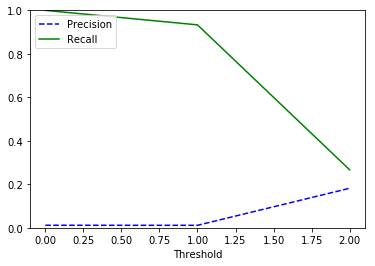

In [28]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [29]:
precisions

array([0.01174628, 0.01145663, 0.18181818, 1.        ])

In [30]:
recalls

array([1.        , 0.93333333, 0.26666667, 0.        ])

In [31]:
thresholds

array([0, 1, 2], dtype=int64)

In [32]:
# lets use some other model 

from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier(n_neighbors=3)

kn_clf.fit(X_train,y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [33]:
kn_predict  = cross_val_predict(kn_clf,X_train,y_train,n_jobs=4,cv=5)

In [34]:
confusion_matrix(y_train,kn_predict)

array([[   5,   45,    0],
       [   9, 1198,    5],
       [   0,   15,    0]], dtype=int64)

In [35]:
accuracy_score(y_train,kn_predict)

0.9420516836335161

In [36]:
kn_scores = cross_val_score(kn_clf,X_train,y_train,n_jobs=5,cv=5)

In [37]:
kn_scores

array([0.94921875, 0.94921875, 0.92941176, 0.93333333, 0.94901961])

In [38]:
# lets try Random forest classifier also

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

In [39]:
rf_predict = cross_val_predict(rf_clf,X_train,y_train,n_jobs=5,cv=5)

In [40]:
accuracy_score(y_train,rf_predict)

0.9444009397024276

In [41]:
cross_val_score(rf_clf,X_train,y_train,n_jobs=5,cv=5)

array([0.94921875, 0.93359375, 0.94901961, 0.9372549 , 0.95294118])

## so we got 94 percentage accuracy.

In [42]:
# now lets see how our model perform on testing set 

rf_test_predict  = cross_val_predict(rf_clf,X_test,y_test,n_jobs=4,cv=3)

In [43]:
accuracy_score(y_test,rf_test_predict)

0.946875

In [44]:
confusion_matrix(y_test,rf_test_predict)

array([[  1,   0,  12],
       [  0,   0,   3],
       [  1,   1, 302]], dtype=int64)

# Conclusion: 

We have seen from this project that if data is not balanced then we should avoid using randomly splitting data , instead of this we should use StratifliedShuffleSplit

We used 3 models in this example DesicionTree, Random Forest and KNeighbour classifier and all of the models given almost same result. around 93 % auurcay. 


